In [6]:
!pip install pyreadr 
!pip install pandas 
!pip install rpy2 
!pip install seaborn
!pip install  matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyreadr-0.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (416 kB)
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached rpy2-3.5.17.tar.gz (220 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      Traceback (most recent call last):
        File "/usr/lib/python3/dist-packages/pip/_vendor/pep517/in_process/_in_process.py", line 363, in <module>
          main()
        File "/usr/lib/python3/dist-packages/pip/_vendor/pep517/in_process/_in_process.py", line 345, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "/usr/lib/python3/dist-pack

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr

In [8]:
def load_rda(file_paths):

  dataframes = {}

  for file_path in file_paths:
      result = pyreadr.read_r(file_path)

      for key in result.keys():
          dataframes[key] = result[key]

  return dataframes

In [9]:
def missing_values(df):
  return(df.isnull().sum())

In [10]:
def plot_variable_distributions(dataframe, output_dir="plots"):
  import os

  # Créer le répertoire si nécessaire
  os.makedirs(output_dir, exist_ok=True)

  # Variables numériques
  for column in dataframe.select_dtypes(include='number').columns:
      plt.figure(figsize=(10, 6))
      sns.histplot(dataframe[column], kde=True, color="blue")
      plt.title(f"Distribution de {column}")
      plt.xlabel(column)
      plt.ylabel("Fréquence")
      # plt.savefig(f"{output_dir}/distribution_{column}.png")
      # plt.close()
      plt.show()
      
  # Variables catégoriques
  for column in dataframe.select_dtypes(include='category').columns:
      plt.figure(figsize=(10, 6))
      sns.countplot(y=dataframe[column], order=dataframe[column].value_counts().index)
      plt.title(f"Distribution de {column}")
      plt.xlabel("Fréquence")
      plt.ylabel(column)
      # plt.savefig(f"{output_dir}/distribution_{column}.png")
      # plt.close()
      plt.show()



In [12]:
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include='number').columns
    plt.figure(figsize=(15, 10))

    # Créer un boxplot pour chaque variable numérique
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()


In [13]:
def clean_data(data_dict):
    cleaned_dict = {}
    for key, df in data_dict.items():
        df_cleaned = df.drop_duplicates()
        if 'RecordBeg' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordBeg'] = pd.to_datetime(df_cleaned['RecordBeg'], errors='coerce')
        if 'RecordEnd' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordEnd'] = pd.to_datetime(df_cleaned['RecordEnd'], errors='coerce')

        cleaned_dict[key] = df_cleaned

    return cleaned_dict

In [14]:
file_paths = ['beMTPL16.rda']

In [ ]:
df = load_rda(file_paths)

In [16]:
df1 = clean_data(df)

In [21]:
df1['beMTPL16'].head()

,insurance_contract,policy_year,exposure,insured_birth_year,vehicle_age,policy_holder_age,driver_license_age,vehicle_brand,vehicle_model,mileage,vehicle_power,catalog_value,claim_value,number_of_liability_claims,number_of_bodily_injury_liability_claims,claim_time,claim_responsibility_rate,driving_training_label,signal
0,C1,1,0.386301,1945,10,9,40,MERCEDES,ME-1245,30000,75,983732,2,0,0,00:00,0,No,0
1,C2,1,0.493151,1941,4,25,24,VOLKSWAGEN,VO-2461,30000,55,510562,8,0,0,07:45,0,No,0
2,C3,1,0.290411,1944,0,2,39,AUDI,AU-967,30000,120,1934768,10,0,0,00:00,0,No,0
3,C4,1,0.336986,1948,1,14,37,LANCIA,LA-2346,30000,51,536755,13,0,0,18:50,0,No,0
4,C5,1,0.219178,1928,3,7,59,CITROEN,CI-1258,30000,54,446725,14,0,0,00:00,100,No,0


In [24]:
df1['beMTPL16'].describe().round(2)

,policy_year,exposure,insured_birth_year,vehicle_age,policy_holder_age,driver_license_age,mileage,vehicle_power,catalog_value,claim_value,number_of_liability_claims,number_of_bodily_injury_liability_claims,claim_responsibility_rate,signal
count,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00,70791.00
mean,2.50,0.44,1941.39,6.16,9.65,38.20,28327.82,77.96,582385.34,80780.79,0.35,0.02,48.42,0.00
std,1.11,0.18,6.96,4.80,6.79,9.55,5711.13,29.63,546006.98,45999.89,0.48,0.14,49.63,0.03
min,1.00,0.20,1911.00,0.00,0.00,0.00,2500.00,30.00,0.00,2.00,0.00,0.00,0.00,0.00
25%,2.00,0.29,1936.00,2.00,4.00,34.00,30000.00,55.00,0.00,41491.50,0.00,0.00,0.00,0.00
50%,3.00,0.40,1943.00,5.00,9.00,41.00,30000.00,74.00,550600.00,82430.00,0.00,0.00,0.00,0.00
75%,3.00,0.56,1947.00,9.00,14.00,43.00,30000.00,92.00,867766.50,120472.00,1.00,0.00,100.00,0.00
max,4.00,1.00,1952.00,60.00,30.00,60.00,30000.00,487.00,7234528.00,169694.00,1.00,1.00,100.00,1.00


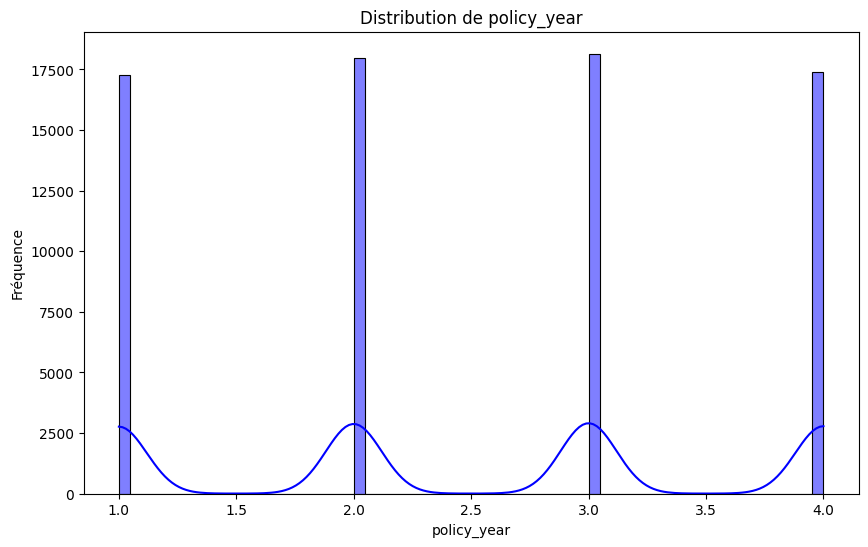

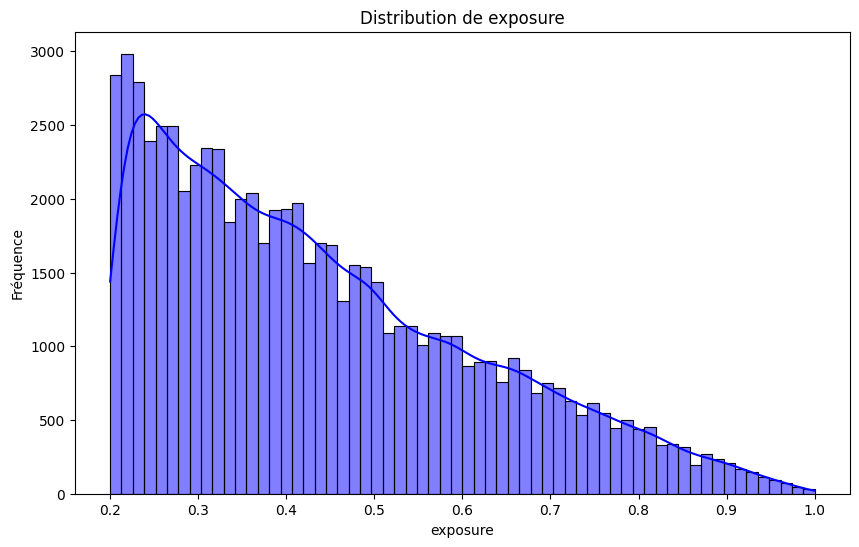

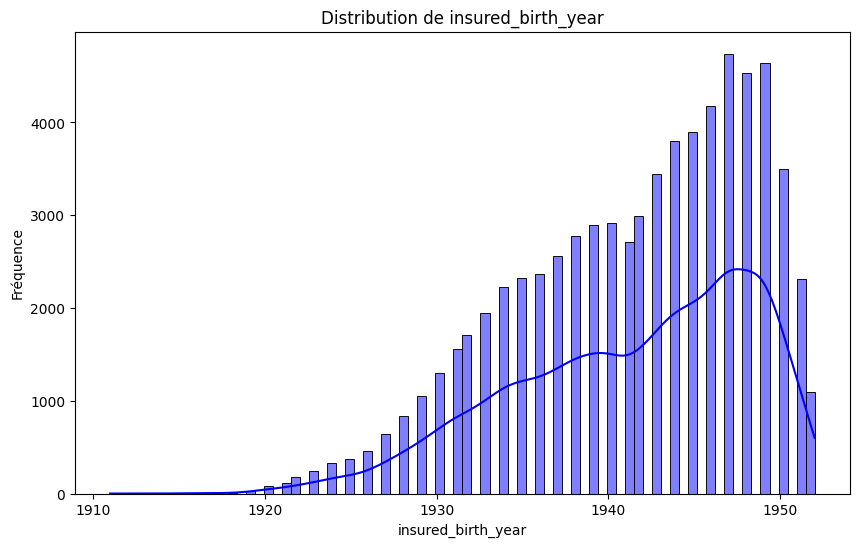

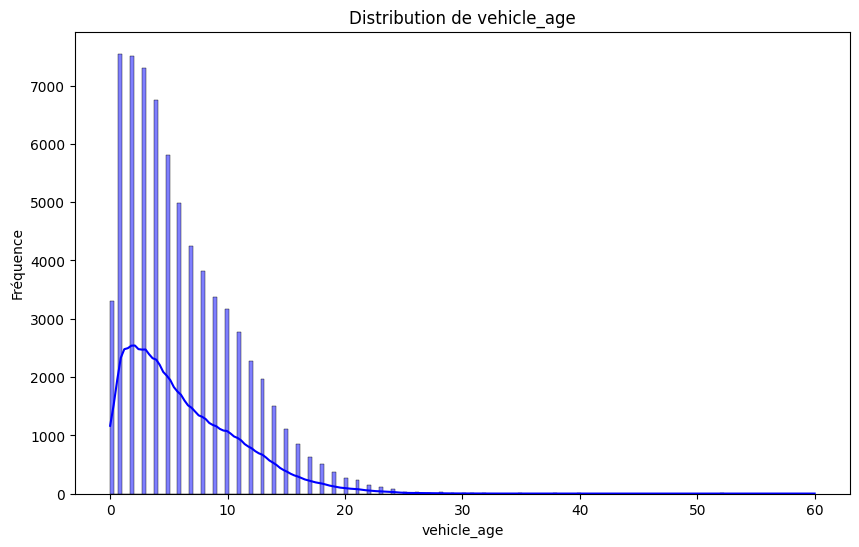

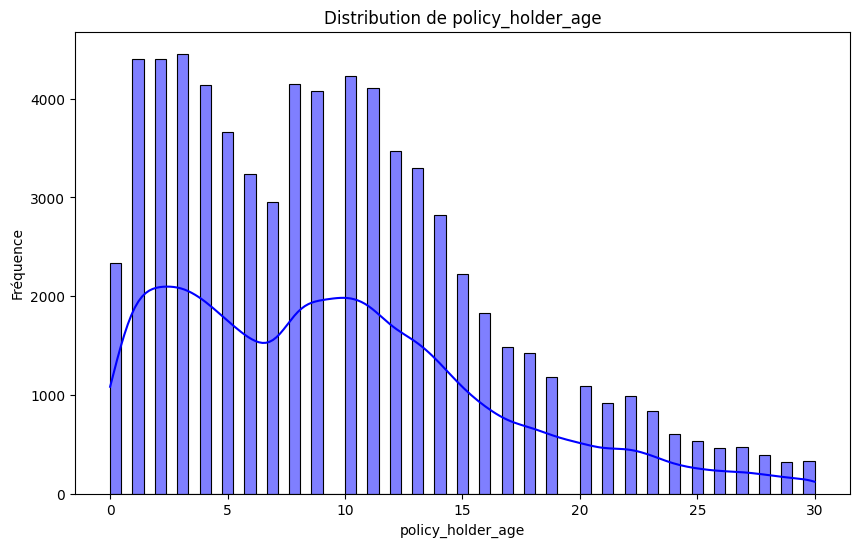

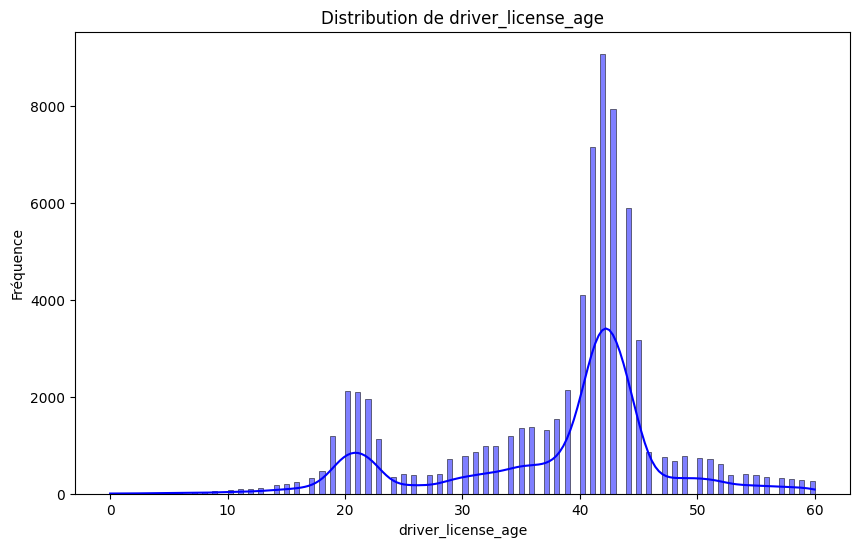

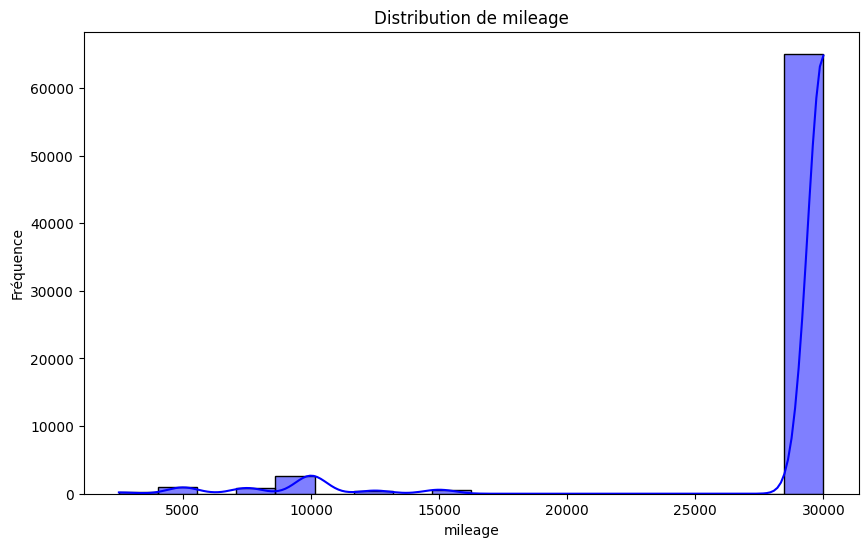

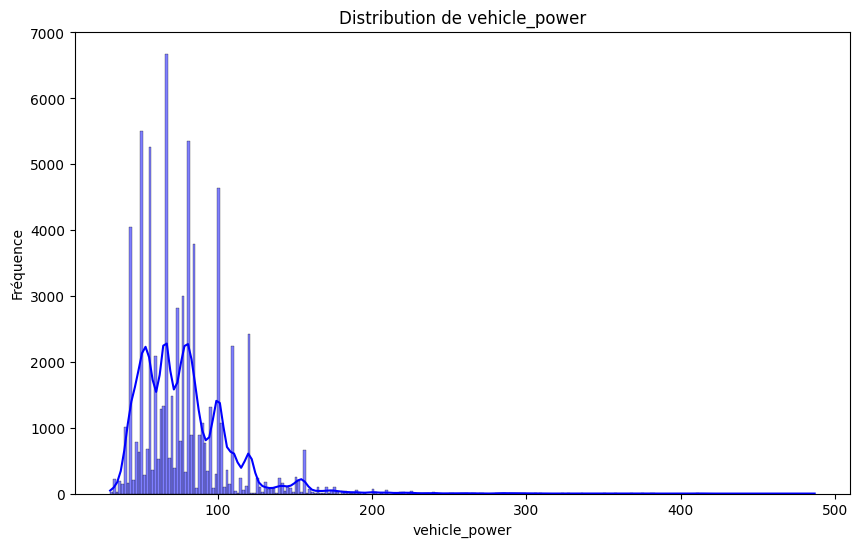

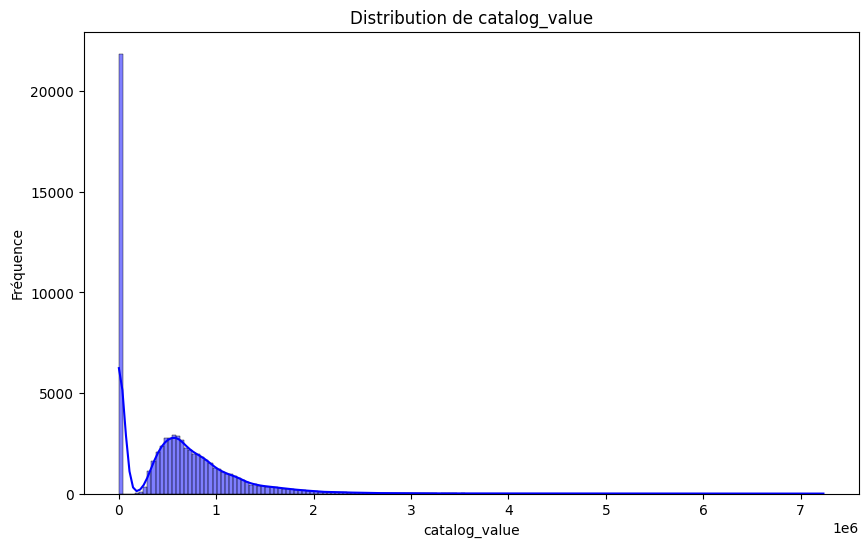

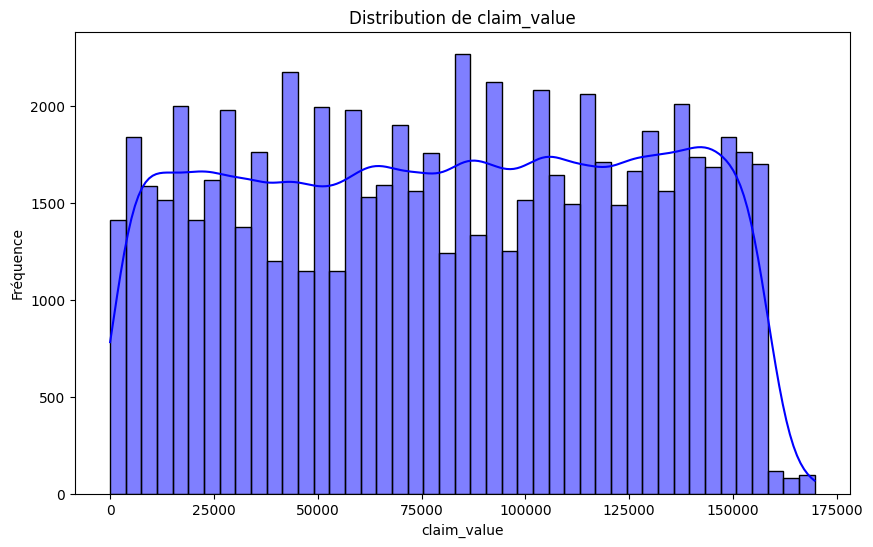

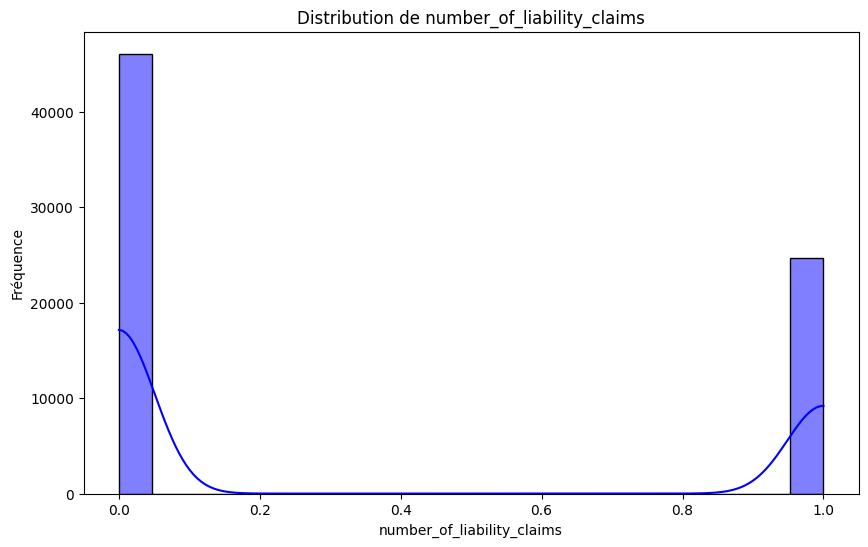

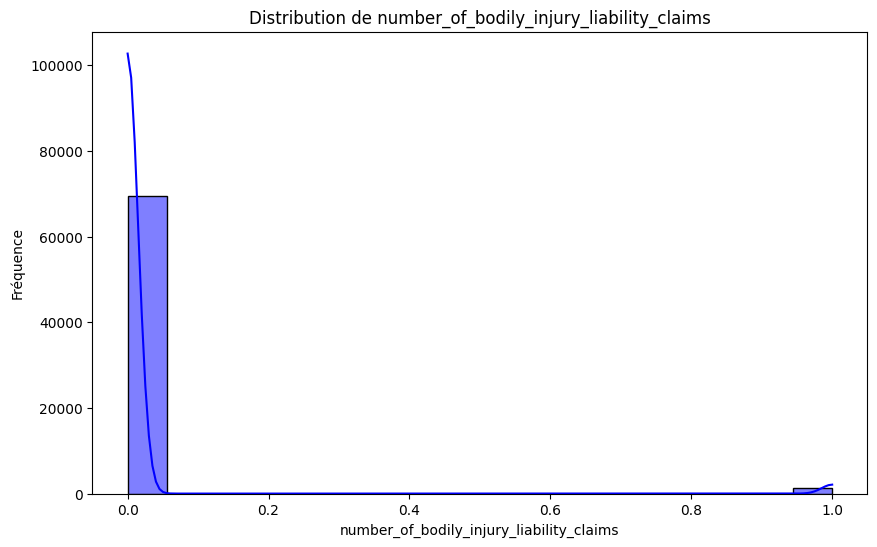

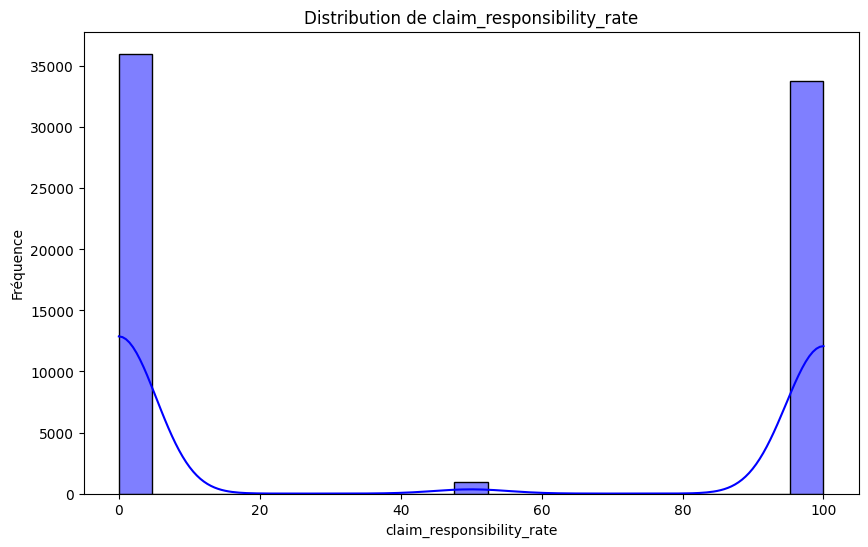

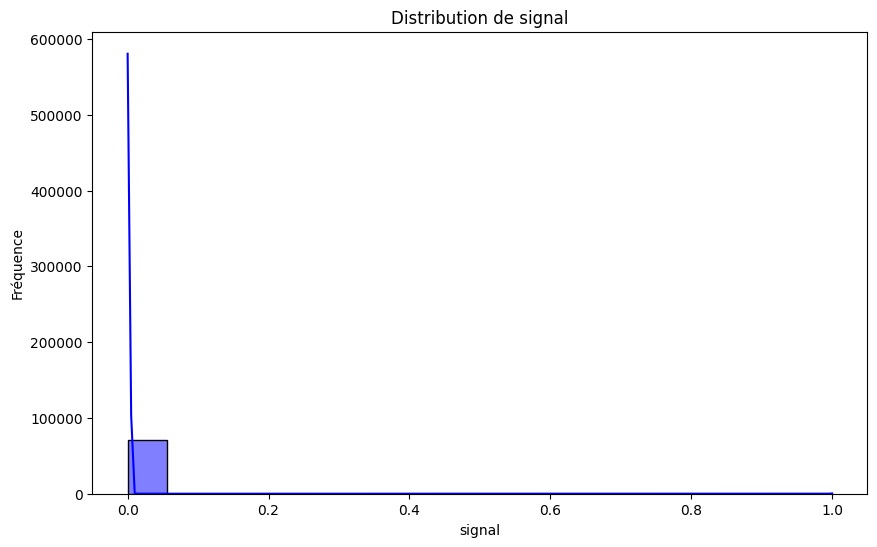

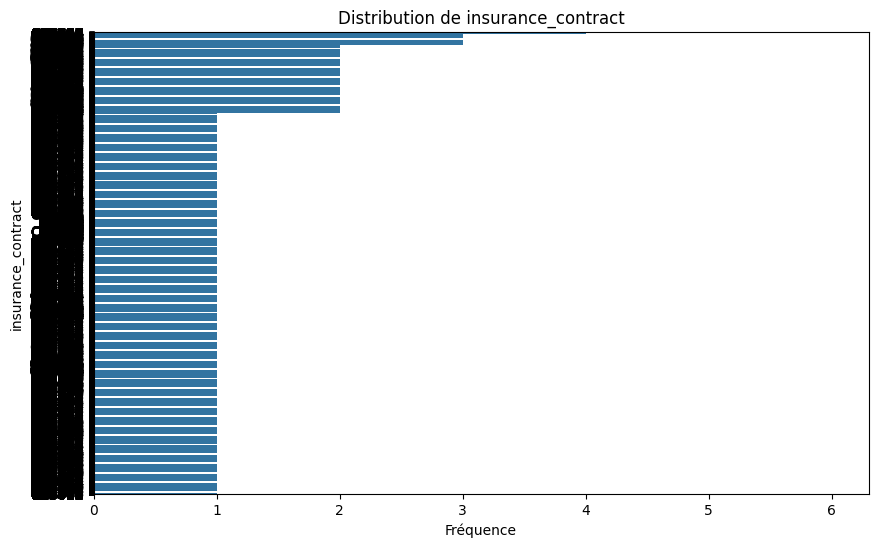

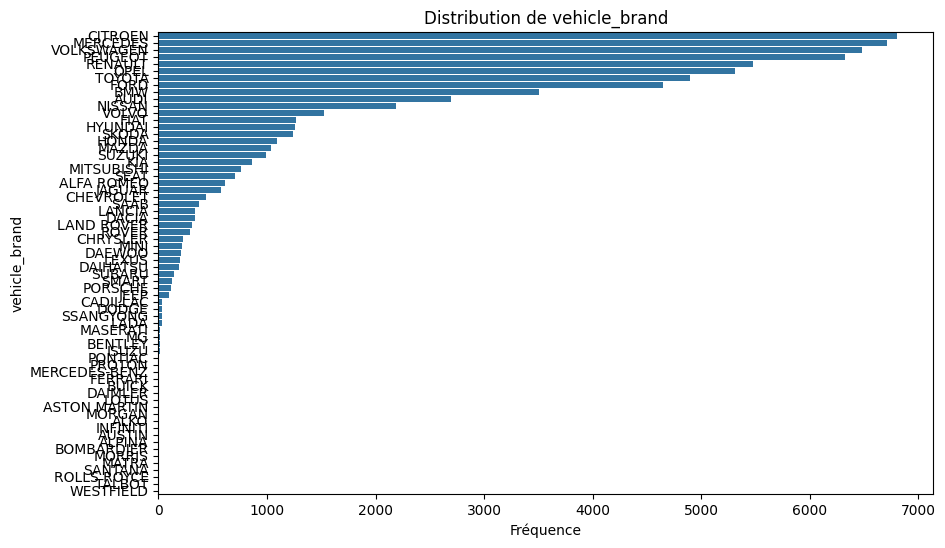

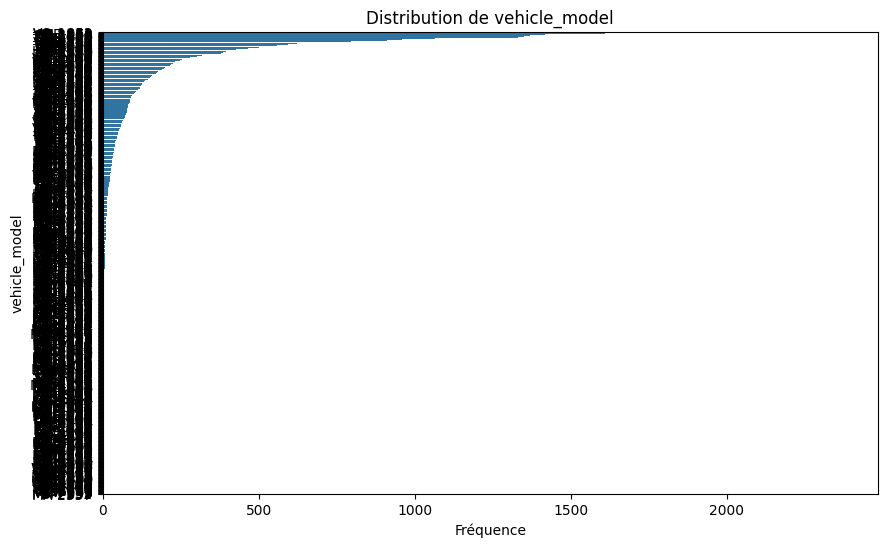

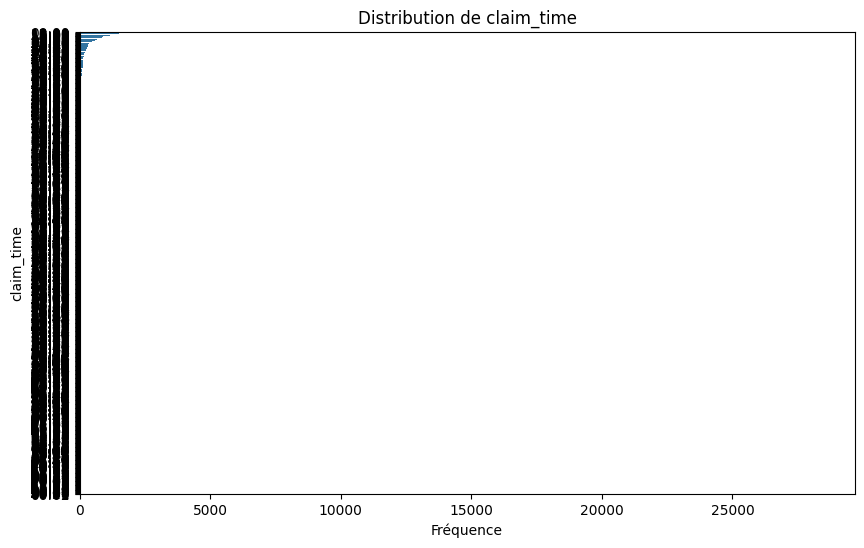

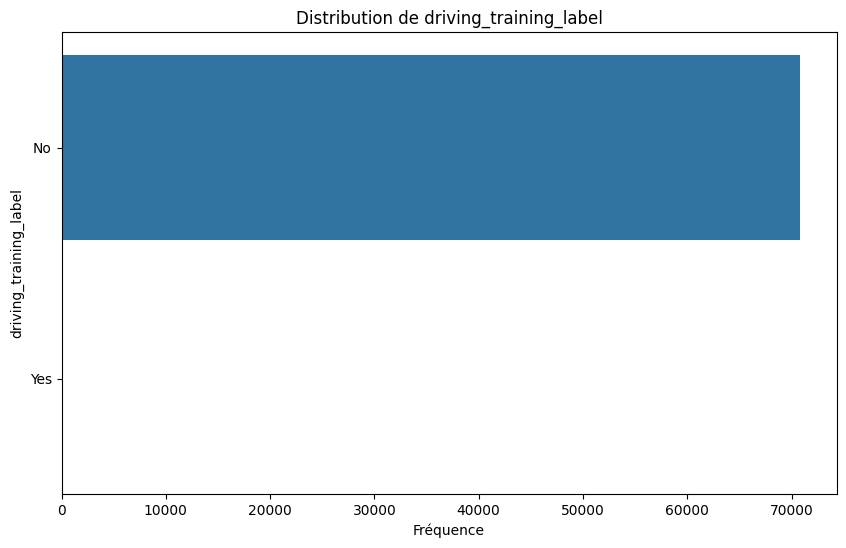

In [23]:
plot_variable_distributions(df1['beMTPL16'])

In [32]:
freMPL1_df.select_dtypes(include='number').columns


Index(['Exposure', 'LicAge', 'DrivAge', 'HasKmLimit', 'BonusMalus',
       'ClaimAmount', 'RiskVar', 'ClaimInd'],
      dtype='object')

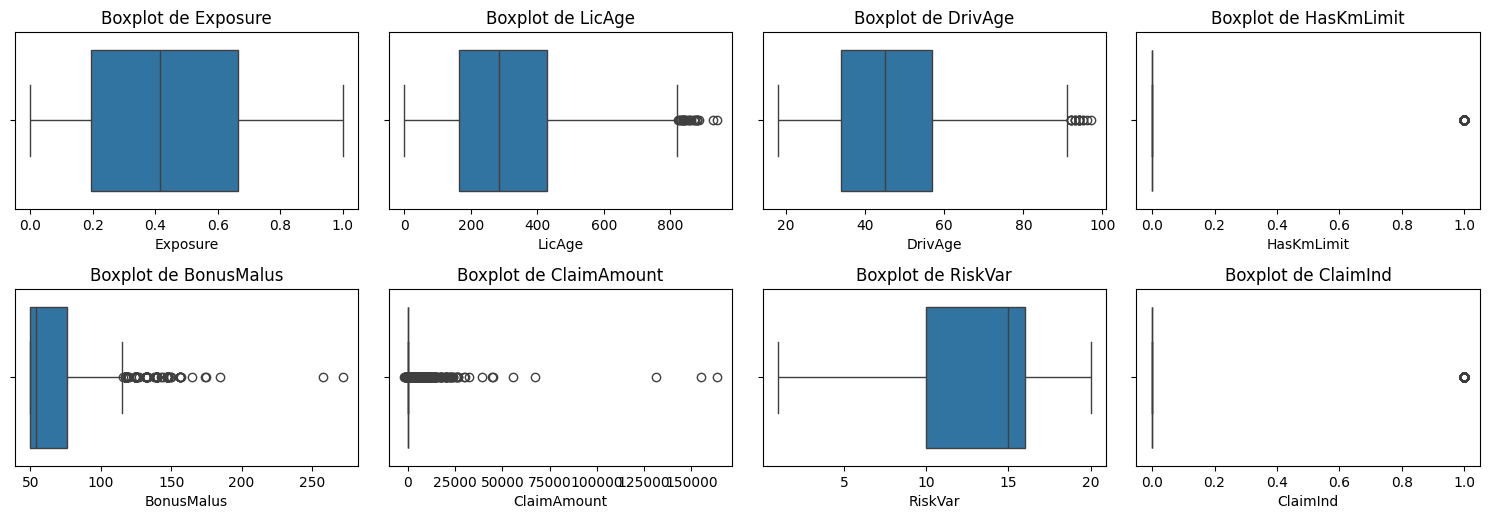

In [33]:
plot_boxplots(freMPL1_df)

Variables en commun

In [34]:
result = pyreadr.read_r('beMTPL16.rda')

In [35]:
result.keys()

odict_keys(['beMTPL16'])

In [36]:
beMTPL16 = result['beMTPL16']

In [37]:
beMTPL16.head()

,insurance_contract,policy_year,exposure,insured_birth_year,vehicle_age,policy_holder_age,driver_license_age,vehicle_brand,vehicle_model,mileage,vehicle_power,catalog_value,claim_value,number_of_liability_claims,number_of_bodily_injury_liability_claims,claim_time,claim_responsibility_rate,driving_training_label,signal
0,C1,1,0.386301,1945,10,9,40,MERCEDES,ME-1245,30000,75,983732,2,0,0,00:00,0,No,0
1,C2,1,0.493151,1941,4,25,24,VOLKSWAGEN,VO-2461,30000,55,510562,8,0,0,07:45,0,No,0
2,C3,1,0.290411,1944,0,2,39,AUDI,AU-967,30000,120,1934768,10,0,0,00:00,0,No,0
3,C4,1,0.336986,1948,1,14,37,LANCIA,LA-2346,30000,51,536755,13,0,0,18:50,0,No,0
4,C5,1,0.219178,1928,3,7,59,CITROEN,CI-1258,30000,54,446725,14,0,0,00:00,100,No,0


In [38]:
result = pyreadr.read_r('euMTPL.rda')
euMTPL = result["euMTPL"]

In [39]:
euMTPL

,policy_id,group,fuel_type,year,vehicle_category,vehicle_use,province,horsepower,gender,age,exposure,cost_nc,num_nc,cost_cg,num_cg,cost_fcg,num_fcg,cost_cd,num_cd
0,1,test,B,7.0,1,1,PA,14,M,77,0.487671,0.0,0,0.0,0,0.0,0,0.0,0
1,2,train,B,7.0,1,1,NA,12,M,40,0.019178,0.0,0,0.0,0,0.0,0,0.0,0
2,4,train,B,7.0,1,1,CN,14,M,75,0.032877,0.0,0,0.0,0,0.0,0,0.0,0
3,5,train,B,7.0,1,1,NA,13,M,48,0.043836,0.0,0,0.0,0,0.0,0,0.0,0
4,6,train,B,7.0,1,1,NA,12,F,54,0.046575,0.0,0,0.0,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373192,2595210,test,B,9.0,1,1,RM,14,F,40,0.246575,0.0,0,0.0,0,0.0,0,0.0,0
2373193,2595211,train,B,9.0,1,1,LE,14,M,52,0.756164,0.0,0,0.0,0,0.0,0,0.0,0
2373194,2595212,test,E,9.0,1,1,LE,1,F,46,0.008219,0.0,0,0.0,0,0.0,0,0.0,0
2373195,2595213,test,T,9.0,1,1,LE,15,M,25,0.723288,0.0,0,0.0,0,0.0,0,0.0,0


In [40]:
freMPL1_df

,Exposure,LicAge,RecordBeg,RecordEnd,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,...,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,ClaimAmount,RiskVar,Garage,ClaimInd
0,0.583,366,2004-06-01 00:00:00,NaT,2,Female,Other,CSP1,Professional,55,...,sedan,D,injection,regular,160-170 km/h,B,0.000000,15,None,0
1,0.200,187,2004-10-19 00:00:00,NaT,0,Male,Alone,CSP55,Private+trip to office,34,...,microvan,K,direct injection overpowered,diesel,170-180 km/h,M1,0.000000,20,None,0
2,0.083,169,2004-07-16 00:00:00,2004-08-16 00:00:00,1,Female,Other,CSP1,Professional,33,...,other microvan,L,direct injection overpowered,diesel,170-180 km/h,M1,0.000000,17,None,0
3,0.375,170,2004-08-16 00:00:00,NaT,1,Female,Other,CSP1,Professional,34,...,other microvan,L,direct injection overpowered,diesel,170-180 km/h,M1,0.000000,17,Private garage,0
4,0.500,224,2004-01-01 00:00:00,2004-07-01 00:00:00,3,Male,Other,CSP47,Professional,53,...,van,L,direct injection overpowered,diesel,140-150 km/h,0,1418.610272,19,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30590,0.531,224,2004-06-20 00:00:00,NaT,6-7,Female,Other,CSP50,Private+trip to office,38,...,sedan,E,injection,regular,150-160 km/h,B,193.692145,9,None,1
30591,0.046,469,2004-10-01 00:00:00,2004-10-18 00:00:00,3,Male,Other,CSP55,Private+trip to office,57,...,sedan,Q,direct injection overpowered,diesel,220+ km/h,M2,0.000000,14,Collective garage,0
30592,0.034,158,2004-11-26 00:00:00,2004-12-08 00:00:00,0,Male,Other,CSP50,Private+trip to office,31,...,station wagon,M,injection,regular,190-200 km/h,M2,0.000000,9,Collective garage,0
30593,0.260,127,2004-01-01 00:00:00,2004-04-05 00:00:00,6-7,Male,Alone,CSP50,Private+trip to office,29,...,cabriolet,K,injection,regular,170-180 km/h,M1,0.000000,18,None,0


In [41]:
euMTPL.columns

Index(['policy_id', 'group', 'fuel_type', 'year', 'vehicle_category',
       'vehicle_use', 'province', 'horsepower', 'gender', 'age', 'exposure',
       'cost_nc', 'num_nc', 'cost_cg', 'num_cg', 'cost_fcg', 'num_fcg',
       'cost_cd', 'num_cd'],
      dtype='object')

In [42]:
beMTPL16.columns

Index(['insurance_contract', 'policy_year', 'exposure', 'insured_birth_year',
       'vehicle_age', 'policy_holder_age', 'driver_license_age',
       'vehicle_brand', 'vehicle_model', 'mileage', 'vehicle_power',
       'catalog_value', 'claim_value', 'number_of_liability_claims',
       'number_of_bodily_injury_liability_claims', 'claim_time',
       'claim_responsibility_rate', 'driving_training_label', 'signal'],
      dtype='object')

In [43]:
freMPL1_df.columns

Index(['Exposure', 'LicAge', 'RecordBeg', 'RecordEnd', 'VehAge', 'Gender',
       'MariStat', 'SocioCateg', 'VehUsage', 'DrivAge', 'HasKmLimit',
       'BonusMalus', 'VehBody', 'VehPrice', 'VehEngine', 'VehEnergy',
       'VehMaxSpeed', 'VehClass', 'ClaimAmount', 'RiskVar', 'Garage',
       'ClaimInd'],
      dtype='object')

[texte du lien](https://)variables en commun : 'Exposure', 'Age'

